In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('height-weight.csv')

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [4]:
df.shape

(23, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 496.0 bytes


Text(0, 0.5, 'Height')

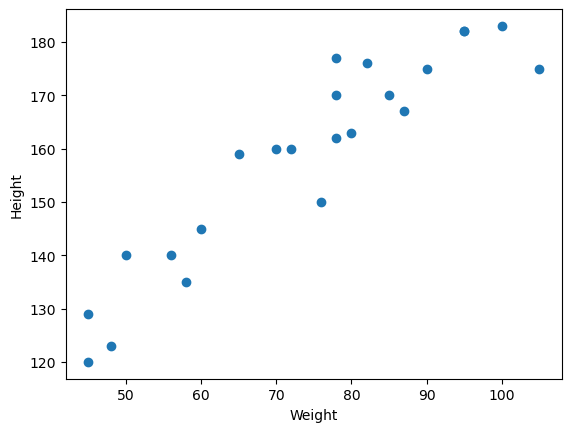

In [6]:
plt.scatter(df.Weight, df.Height)
plt.xlabel('Weight')
plt.ylabel('Height')

In [7]:
x=df[['Weight']]

In [8]:
y=df[['Height']]

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
x_train, x_test, y_train, y_test

(    Weight
 12     105
 1       58
 13     100
 5       78
 2       48
 11      95
 20      45
 3       60
 4       70
 18      76
 16      50
 21      56
 22      72
 7       90
 10      82
 14      85
 19      87
 6       80,
     Weight
 15      78
 9       78
 0       45
 8       95
 17      65,
     Height
 12     175
 1      135
 13     183
 5      162
 2      123
 11     182
 20     129
 3      145
 4      160
 18     150
 16     140
 21     140
 22     160
 7      175
 10     176
 14     170
 19     167
 6      163,
     Height
 15     177
 9      170
 0      120
 8      182
 17     159)

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

In [14]:
x_train = scaler.fit_transform(x_train)

In [15]:
x_test = scaler.transform(x_test)

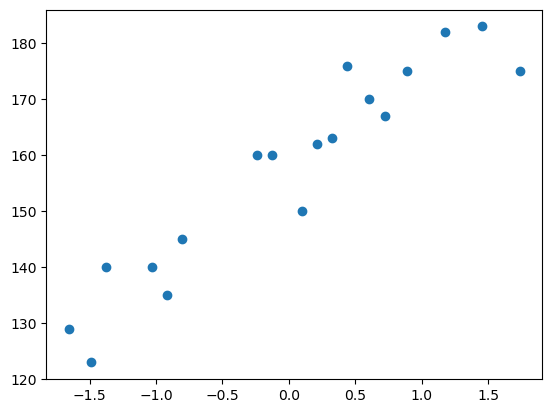

In [16]:
plt.scatter(x_train, y_train)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
regressor = LinearRegression()

In [19]:
regressor.fit(x_train, y_train)

LinearRegression()

In [20]:
regressor.coef_

array([[17.03440872]])

In [21]:
regressor.intercept_

array([157.5])

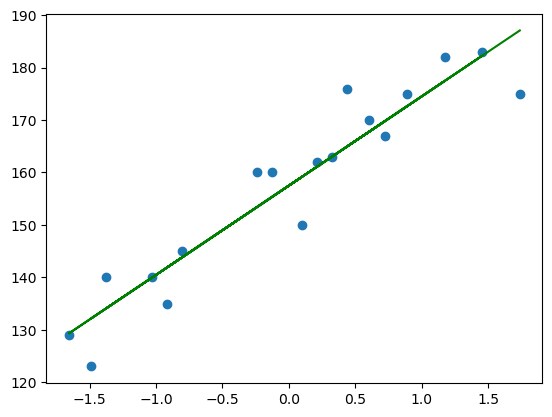

In [22]:
plt.scatter(x_train, y_train)
plt.plot(x_train, regressor.predict(x_train), 'g')

In [23]:
y_pred_test = regressor.predict(x_test)

In [24]:
y_pred_test, y_test

(array([[161.08467086],
        [161.08467086],
        [129.3041561 ],
        [177.45645118],
        [148.56507414]]),
     Height
 15     177
 9      170
 0      120
 8      182
 17     159)

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [26]:
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mse)

In [27]:
mse, mae, rmse

(109.77592599051664, 9.822657814519232, 10.477400726827081)

In [28]:
from sklearn.metrics import r2_score

In [29]:
r_score = r2_score(y_test, y_pred_test)

In [30]:
r_score

0.776986986042344

In [31]:
adj_r_score = 1 - ((1-r_score)*(len(df)-1))/(len(df)-df.shape[1]-2)

In [32]:
df.shape[1]-1

1

In [33]:
len(df)

23

In [34]:
adj_r_score

0.7417744048911351

In [35]:
new_weight= 88

In [36]:
scaled_weight=scaler.transform([[88]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [37]:
scaled_weight

array([[0.77579035]])

In [38]:
predicted_height = regressor.predict(scaled_weight)

In [39]:
predicted_height

array([[170.71512987]])

In [41]:
## To check how good the model is-
## 1. The scatter plot of y-test and y-predicted must have a linear relationship
## 2. The error (y-test - y-predicted) must have a normal distribution

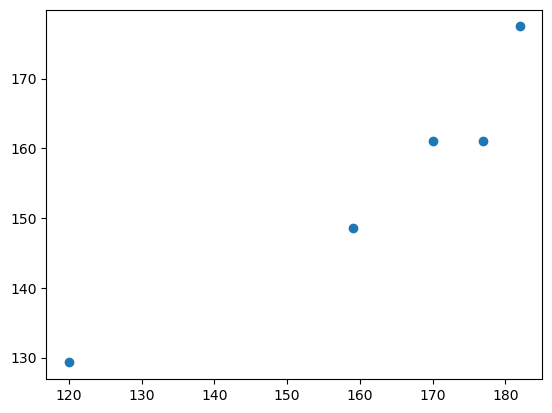

In [42]:
plt.scatter(y_test, y_pred_test)

In [43]:
error = y_test - y_pred_test

In [44]:
import seaborn as sns

/tmp/ipykernel_95/3497407678.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(error, kde=True)


<AxesSubplot: ylabel='Density'>

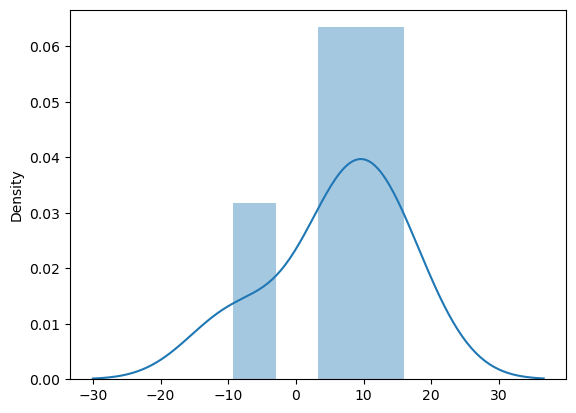

In [46]:
sns.distplot(error, kde=True)